## Question 2 (b)(iii)

### Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings("ignore")
import time
import pandas as pd

### Setting the model parameter like shape of input image and number of labels in CIFAR Dataset

In [2]:
num_classes = 10
input_shape = (32, 32, 3)

### Creating a function that takes train size as input and trains the model

In [3]:
def Create_Conv_Model(n = 5000) : 
    
    ### Loading the data and splitting data in train and test split. Also normalising the data
    
    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    x_train = x_train[1:n]; y_train=y_train[1:n]

    # Scale images to the [0, 1] range
    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    print("orig x_train shape:", x_train.shape)

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    
    
    ### Setting the ConvNet parameters and Training the ConvNet model
    model_name = "cifar_" + str(n) + ".model"
    use_saved_model = False
    if use_saved_model:
        model = keras.models.load_model(model_name)
    else:
        model = keras.Sequential()
        model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
        model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
        model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
        model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
        model.add(Dropout(0.5))
        model.add(Flatten())
        model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
        model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
        model.summary()
        batch_size = 128
        epochs = 20
        
        ##Saving the time to train the CNN
        start_time = time.time()
        history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
        model.save(model_name)
        train_time = time.time() - start_time
        
        ### Plot of Model Accuracy Vs.Epochs
        plt.figure()
        plt.subplot(211)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(f'model accuracy for training size {n}')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        
        
        ### Plot of Model Loss Vs.Epochs
        plt.figure()
        plt.subplot(212)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(f'model loss for training size {n}')
        plt.ylabel('loss'); plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
    
    
    ### Testing model accuracy on Train Data
    preds_train = model.predict(x_train)
    y_pred_train = np.argmax(preds_train, axis=1)
    y_train1 = np.argmax(y_train, axis=1)
    print(f'Model Accuracy on Train Data for Training Size: {n}')
    print(classification_report(y_train1, y_pred_train))
    print(confusion_matrix(y_train1, y_pred_train))
    
    
    ### Testing model accracy on Test data
    preds_test = model.predict(x_test)
    y_pred_test = np.argmax(preds_test, axis=1)
    y_test1 = np.argmax(y_test, axis=1)
    print(f'\n\nModel Accuracy on Test Data for Training Size: {n}')
    print(classification_report(y_test1, y_pred_test))
    print(confusion_matrix(y_test1, y_pred_test))
    
    training_size_str = str(n)
    training_time_str = str(round(train_time, 2)) + ' seconds'
    accuracy_score_train = round(accuracy_score(y_train1, y_pred_train) * 100, 2)
    accuracy_score_train_str = str(accuracy_score_train) + '%'
    accuracy_score_test = round(accuracy_score(y_test1, y_pred_test) * 100, 2)
    accuracy_score_test_str = str(accuracy_score_test) + '%'
    
    
    CNN_model_Params_array = pd.array([training_size_str, training_time_str, accuracy_score_train_str, accuracy_score_test_str])
    
    return CNN_model_Params_array

### Trying above function for Different values of Training Sizes

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)    

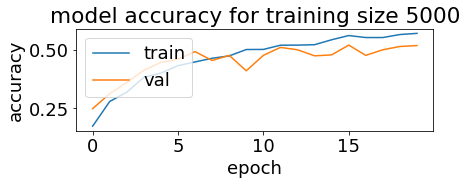

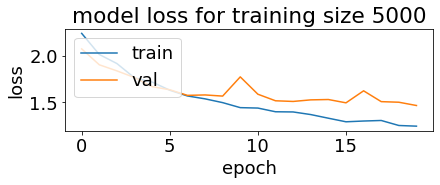

Model Accuracy on Train Data for Training Size: 5000
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       505
           1       0.78      0.68      0.73       460
           2       0.50      0.59      0.54       519
           3       0.59      0.43      0.50       486
           4       0.56      0.49      0.52       519
           5       0.60      0.57      0.59       488
           6       0.72      0.61      0.66       518
           7       0.61      0.71      0.66       486
           8       0.58      0.84      0.69       520
           9       0.71      0.71      0.71       498

    accuracy                           0.62      4999
   macro avg       0.63      0.62      0.62      4999
weighted avg       0.63      0.62      0.62      4999

[[287  15  25   8   7   2   3  13 129  16]
 [ 18 314   4   0   3   1   6   4  54  56]
 [ 33   7 306  19  47  20  20  35  26   6]
 [  7   4  49 208  34  73  37  37  20  17]
 [ 30   3  92  1

In [4]:
n = 5000
CNN_model_array_5K = Create_Conv_Model(n)


orig x_train shape: (9999, 32, 32, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)

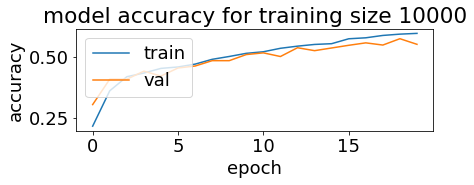

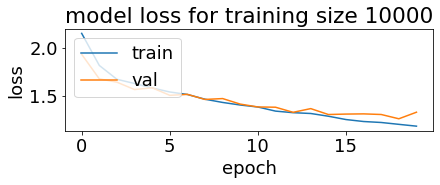

Model Accuracy on Train Data for Training Size: 10000
              precision    recall  f1-score   support

           0       0.59      0.63      0.61      1005
           1       0.72      0.79      0.75       974
           2       0.62      0.44      0.51      1032
           3       0.54      0.50      0.52      1016
           4       0.64      0.45      0.53       999
           5       0.51      0.65      0.57       937
           6       0.81      0.60      0.69      1029
           7       0.65      0.72      0.68      1001
           8       0.60      0.82      0.70      1025
           9       0.68      0.72      0.70       981

    accuracy                           0.63      9999
   macro avg       0.64      0.63      0.63      9999
weighted avg       0.64      0.63      0.63      9999

[[636  44  22   9  11   7   3  12 223  38]
 [ 22 766   2   2   0   5   8   6  84  79]
 [113  21 450  74  69 104  36  82  51  32]
 [ 31  10  50 503  46 213  35  54  32  42]
 [ 73  12  93  

In [5]:
n = 10000
CNN_model_array_10K = Create_Conv_Model(n)


orig x_train shape: (19999, 32, 32, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense

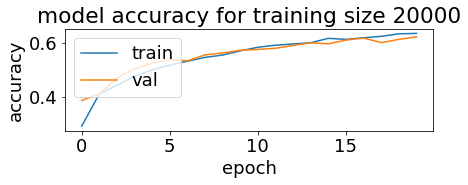

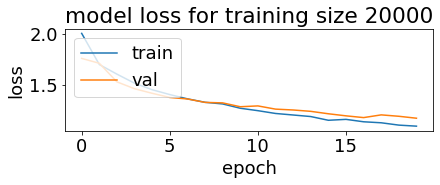

Model Accuracy on Train Data for Training Size: 20000
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      1989
           1       0.88      0.73      0.80      1981
           2       0.62      0.56      0.59      2042
           3       0.56      0.48      0.52      2011
           4       0.65      0.58      0.61      2009
           5       0.53      0.70      0.61      1925
           6       0.68      0.81      0.74      2037
           7       0.78      0.73      0.76      2027
           8       0.81      0.78      0.79      2012
           9       0.76      0.78      0.77      1966

    accuracy                           0.69     19999
   macro avg       0.70      0.69      0.69     19999
weighted avg       0.70      0.69      0.69     19999

[[1509   18   79   31   33   38   19   30  171   61]
 [  79 1440   19   25    8   15   33   14   80  268]
 [ 130    6 1145  129  161  210  156   60   23   22]
 [  32    6  119  973   99  

In [6]:
n = 20000
CNN_model_array_20K = Create_Conv_Model(n)


orig x_train shape: (39999, 32, 32, 3)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_3 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense

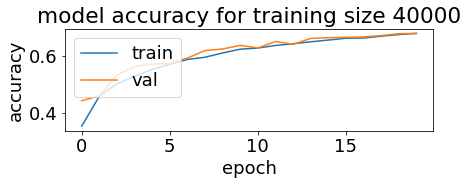

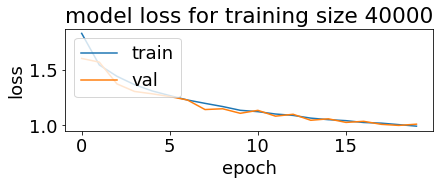

Model Accuracy on Train Data for Training Size: 40000
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      3986
           1       0.86      0.83      0.85      3986
           2       0.61      0.66      0.63      4048
           3       0.64      0.43      0.51      3984
           4       0.61      0.70      0.65      4003
           5       0.72      0.54      0.62      3975
           6       0.65      0.86      0.74      4019
           7       0.74      0.78      0.76      4023
           8       0.83      0.83      0.83      3997
           9       0.80      0.84      0.82      3978

    accuracy                           0.72     39999
   macro avg       0.72      0.72      0.72     39999
weighted avg       0.72      0.72      0.72     39999

[[2969   90  208   42   87   20   38   63  337  132]
 [  77 3314   30   12   18    6   60   16   75  378]
 [ 241   15 2654  107  355  125  314  143   71   23]
 [  47   22  378 1706  424  

In [7]:
n = 40000
CNN_model_array_40K = Create_Conv_Model(n)


In [8]:
final_data_array = np.vstack((CNN_model_array_5K, CNN_model_array_10K))
final_data_array = np.vstack((final_data_array, CNN_model_array_20K))
final_data_array = np.vstack((final_data_array, CNN_model_array_40K))

CNN_Models_DF = pd.DataFrame()
CNN_Models_DF = CNN_Models_DF.append(pd.DataFrame(final_data_array, columns = ["Training Size", "Training Time", "Accuracy on Training Data", "Accuracy on Test Data"]), ignore_index = True)

display(CNN_Models_DF)




,Training Size,Training Time,Accuracy on Training Data,Accuracy on Test Data
0,5000,12.3 seconds,62.01%,49.86%
1,10000,14.55 seconds,63.01%,55.17%
2,20000,26.91 seconds,69.12%,61.47%
3,40000,54.29 seconds,72.14%,67.74%
